<a href="https://colab.research.google.com/github/Arnavvv16/AI_Notes/blob/main/KTS_25_26_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from Scratch!

In this stage, we'll build a simple linear regression model from the ground up—without using any machine learning libraries.

By doing this, you'll gain a deeper understanding of what happens under the hood when training a model. We'll walk through the core steps of linear regression using only numpy and pandas, which will help you understand how models learn and optimize their parameters.

1. Create a dataset

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200 random values for the feature column
X = np.random.rand(200)

# Generate noise
noise = np.random.normal(0, 0.3, 200) #(Mean of distribution, Standard Deviation, Number of samples to create)

# Generate target column with a linear relationship
y = 2 * X + 5 + noise

# Create a DataFrame
df = pd.DataFrame({'Feature': X, 'Target': y})

# Save the DataFrame to a CSV file
df.to_csv('linear_regression_dataset.csv', index=False)

print(df.head())

    Feature    Target
0  0.374540  5.545073
1  0.950714  6.971105
2  0.731994  6.551910
3  0.598658  5.983012
4  0.156019  5.871770


2. Visualise the data

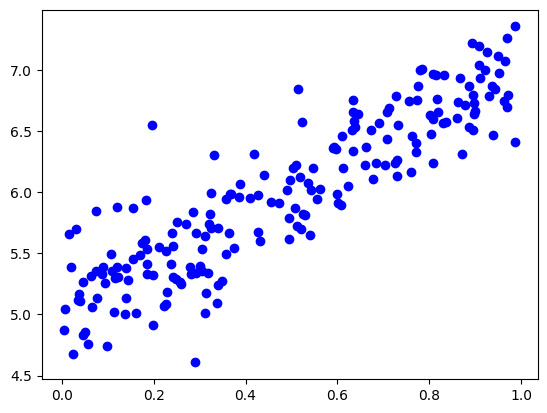

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X, y,'bo')
#ro sets the datapoints to red dots
plt.show()


3. Coding it from scratch

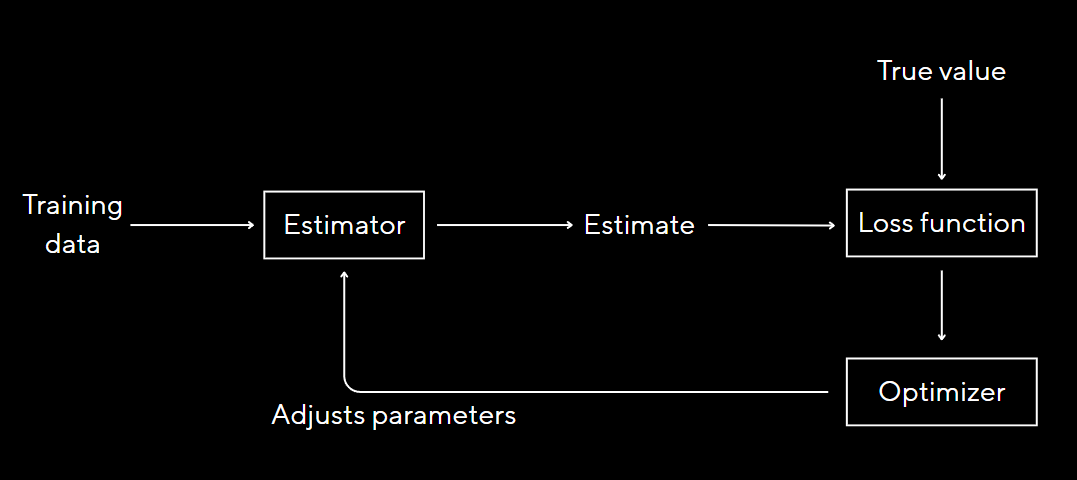

In [ ]:
#Hyperparameters
learning_rate = 0.1
epochs = 150

#To plot loss later on
history_loss = []

#Initialize parameters
w = np.random.randn()
b = np.random.randn()

#Training loop
for epoch in range(epochs):
    y_pred = w * X + b
    loss = np.mean((y - y_pred)**2)  # MSE
    history_loss.append(loss)

    # Gradients
    dw = -2 * np.mean((y - y_pred) * X)
    db = -2 * np.mean(y - y_pred)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")


Epoch 0: Loss = 33.0604, w = 1.4320, b = 0.9867
Epoch 10: Loss = 0.2902, w = 2.9447, b = 4.2855
Epoch 20: Loss = 0.1622, w = 2.8997, b = 4.5380
Epoch 30: Loss = 0.1430, w = 2.7843, b = 4.6108
Epoch 40: Loss = 0.1287, w = 2.6795, b = 4.6660
Epoch 50: Loss = 0.1178, w = 2.5882, b = 4.7135
Epoch 60: Loss = 0.1096, w = 2.5087, b = 4.7549
Epoch 70: Loss = 0.1034, w = 2.4395, b = 4.7908
Epoch 80: Loss = 0.0987, w = 2.3794, b = 4.8221
Epoch 90: Loss = 0.0951, w = 2.3270, b = 4.8493
Epoch 100: Loss = 0.0924, w = 2.2815, b = 4.8730
Epoch 110: Loss = 0.0904, w = 2.2419, b = 4.8936
Epoch 120: Loss = 0.0889, w = 2.2074, b = 4.9116
Epoch 130: Loss = 0.0877, w = 2.1774, b = 4.9272
Epoch 140: Loss = 0.0868, w = 2.1513, b = 4.9407


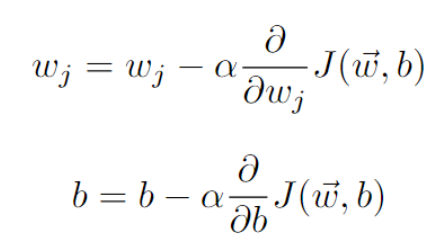

4. Plotting the loss

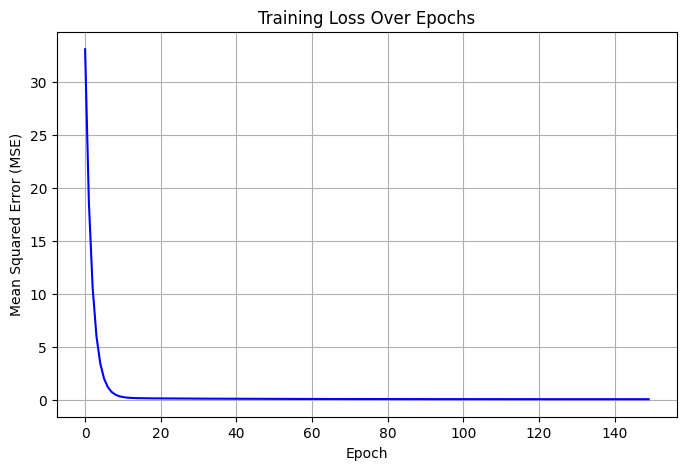

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), history_loss, color='blue')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


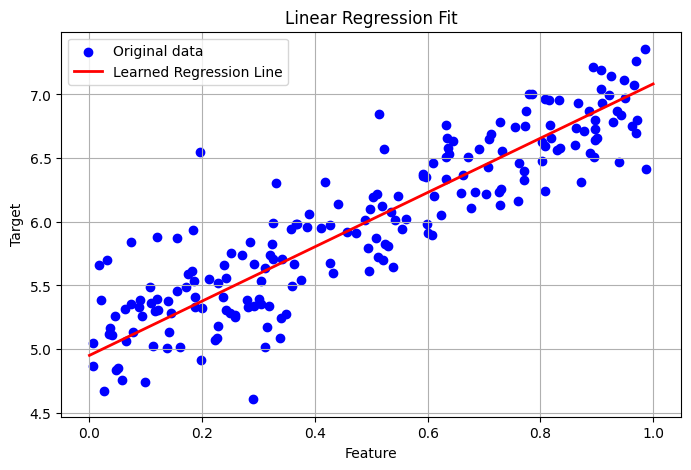

In [ ]:
# Scatter plot of original data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Original data')

# Regression line
x_vals = np.linspace(0, 1, 100)  # cover the range of X
y_vals = w * x_vals + b
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Learned Regression Line')

# Labels and legend
plt.title("Linear Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


# Using Scikit-Learn for Linear Regression

Now that we’ve built linear regression from scratch, let’s see how we can achieve the same result much faster using scikit-learn, a powerful machine learning library in Python.

1. Code

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset from CSV
df = pd.read_csv('linear_regression_dataset.csv')

# Extract feature and target
X = df[['Feature']]  # 2D array
y = df['Target']     # 1D array

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Model parameters
print(f"Learned weight (slope): {model.coef_[0]:.4f}")
print(f"Learned bias (intercept): {model.intercept_:.4f}")


Learned weight (slope): 1.9766
Learned bias (intercept): 5.0316


2. Visualisation

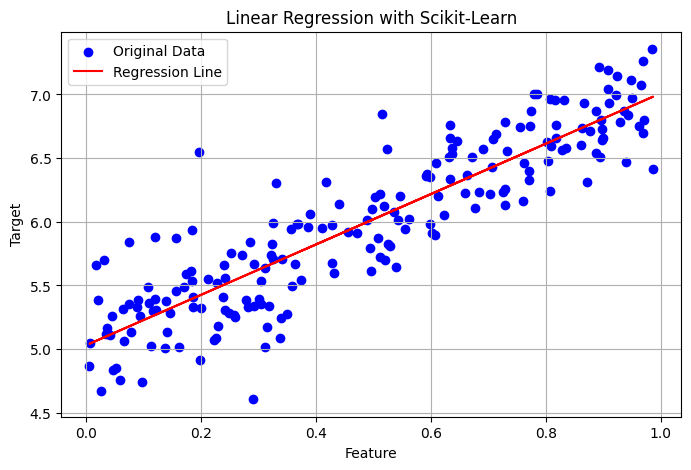

In [ ]:
# Scatter the original data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Original Data', color='blue')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression with Scikit-Learn")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

# Multilinear Regression

We're going to build a model that trains on a salary dataset and predicts the salary of a person.

Link to the dataset: https://www.kaggle.com/datasets/pavlosoletskyi/salaries

Download the dataset and upload it to Colab's files before running the code blocks below.

1. Import the modules

In [ ]:
from sklearn.model_selection import train_test_split #To split data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression Model
from sklearn.preprocessing import OneHotEncoder #To convert categorical variables to one hot encoded numerical variables
from sklearn.preprocessing import StandardScaler #To standardize the numerical variables
from sklearn.compose import ColumnTransformer #Helps apply different preprocessing techniques to different column types
from sklearn.pipeline import Pipeline #Chains together the preprocessing and modelling into one object
from sklearn.metrics import mean_squared_error, r2_score #Metrics

2. Data Preprocessing

In [ ]:
df = pd.read_csv('salary.csv')
#Features and Target
X = df.drop("salary", axis=1)
y = df["salary"]

In [ ]:
#Define numerical and categorical columns and preprocess them:
categorical_cols = ["rank", "discipline", "sex"]
numerical_cols = ["yrs.since.phd", "yrs.service"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

3. Build Pipeline, Train test split, Train model

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

4. Evaluate the model

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(584765286.8530645, 0.2386600734322184)